In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import os


main_path = os.path.split(os.getcwd())[0]
config_path = main_path + '/config.csv'
config_data = pd.read_csv(config_path, sep=',', header=None, index_col=0)

results_path  = config_data.loc['results_dir'][1]


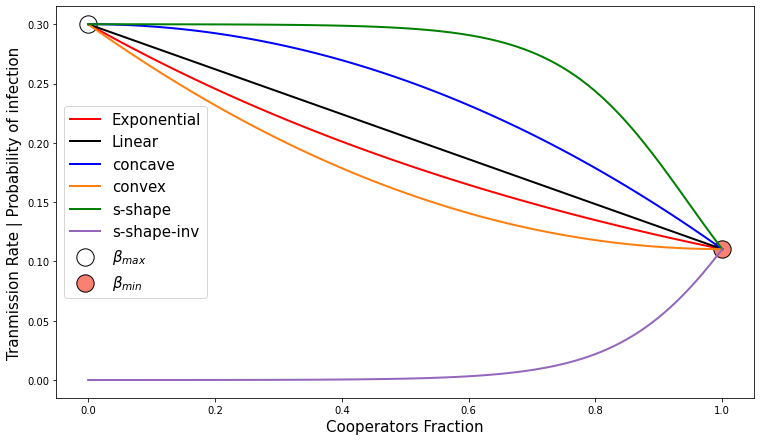

In [144]:

def beta_cooperation_exp(beta_max, coop_frac, type_response="exponential"):

    if type_response=="exponential":
        beta = beta_max*np.exp(-coop_frac)
    elif type_response=="linear":
        # beta = beta_max*(1-coop_frac)  + np.exp(-1)*beta_max*coop_frac
        beta_min = beta_max*np.exp(-1)
        beta = (beta_min - beta_max)*coop_frac + beta_max
    elif type_response=="linear-perp":
        # betal = beta_max*(1-coop_frac)  + np.exp(-1)*beta_max*coop_frac
        beta_min = beta_max*np.exp(-1)
        beta_y = (beta_min - beta_max)*coop_frac + beta_max
        m = -1/(beta_min - beta_max)
        beta = m*coop_frac
    elif type_response=="concave":
        # beta2 =  beta_max*np.exp(-coop_frac) - beta_max*(1-coop_frac)  - np.exp(-1)*beta_max*coop_frac
        p = 1/(4*(beta_max*np.exp(-1) - beta_max))
        beta2 = (coop_frac**2)/(4*p) + beta_max
        beta  = beta2
    elif type_response=='convex':
        p = 1/(4*(beta_max - beta_max*np.exp(-1)))
        beta2 = ((coop_frac-1)**2)/(4*p) + beta_max*np.exp(-1)
        beta  = beta2
    elif type_response=='s-shape':
        beta_min = beta_max*np.exp(-1)
        # r = -np.log( (beta_max/c - 1) / (beta_max/c - 1) )
        # beta3 = ((1-c)/(1+np.exp(10*(coop_frac/10000 - 1)))) + c
        r = 10
        c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        beta3 = beta_max/(1 + ((beta_max - beta_min)/beta_min) * np.exp(-(1-coop_frac)*r))
        beta = beta3
    elif type_response=='s-shape-inv':
        beta_min = beta_max*np.exp(-1)
        beta_y = (beta_min - beta_max)*coop_frac + beta_max
        r = 10
        c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        # beta3 = (np.log(beta_max/-coop_frac - 1) - np.log((beta_max - beta_min)/beta_min))/r +1

        # r = 10
        # c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        beta3 = beta_max/(1 + ((beta_max - beta_min)/beta_min) * np.exp((1-coop_frac)*r))
        
        beta = beta3

    return beta

coop_frac_vec = np.linspace(0, 1, 100)

beta_max = 0.3
betas_exp    = [beta_cooperation_exp(beta_max, c, type_response="exponential") for c in coop_frac_vec]
betas_linear = [beta_cooperation_exp(beta_max, c, type_response="linear") for c in coop_frac_vec]
betas_linear_perp = [beta_cooperation_exp(beta_max, c, type_response="linear-perp") for c in coop_frac_vec]
betas_conc = [beta_cooperation_exp(beta_max, c, type_response="concave") for c in coop_frac_vec]
betas_conv = [beta_cooperation_exp(beta_max, c, type_response="convex") for c in coop_frac_vec]
betas_s = [beta_cooperation_exp(beta_max, c, type_response="s-shape") for c in coop_frac_vec]
betas_s_inv = [beta_cooperation_exp(beta_max, c, type_response="s-shape-inv") for c in coop_frac_vec]

fig, ax = plt.subplots(1, 1, figsize=(12.5, 7.2))

ax.plot(coop_frac_vec, betas_exp, label="Exponential", linewidth=2, color="red")
ax.plot(coop_frac_vec, betas_linear, label="Linear", linewidth=2, color="k")
# ax.plot(coop_frac_vec, betas_linear_perp, label="Linear Peror", linewidth=2, color="k")
ax.plot(coop_frac_vec, betas_conc, label="concave", linewidth=2, color="blue")
ax.plot(coop_frac_vec, betas_conv, label="convex", linewidth=2, color="tab:orange")
ax.plot(coop_frac_vec, betas_s, label="s-shape", linewidth=2, color="g")
ax.plot(coop_frac_vec, betas_s_inv, label="s-shape-inv", linewidth=2, color="tab:purple")


ax.scatter(0, beta_max, edgecolor='k', facecolor='w', s = 300, label=r"$\beta_{max}$")
ax.scatter(1, beta_max * np.exp(-1), edgecolor='k', facecolor='salmon', s = 300, label=r"$\beta_{min}$")

ax.set_ylabel("Tranmission Rate | Probability of infection", fontsize=15)
ax.set_xlabel("Cooperators Fraction", fontsize=15)
ax.legend(fontsize=15)



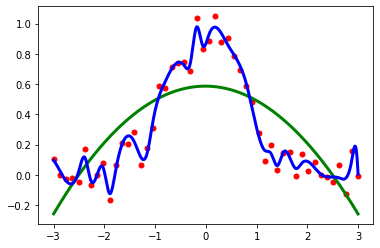

In [119]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

rng = np.random.default_rng()
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * rng.standard_normal(50)
plt.plot(x, y, 'ro', ms=5)


####
spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)
###

spl.set_smoothing_factor(0.1)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

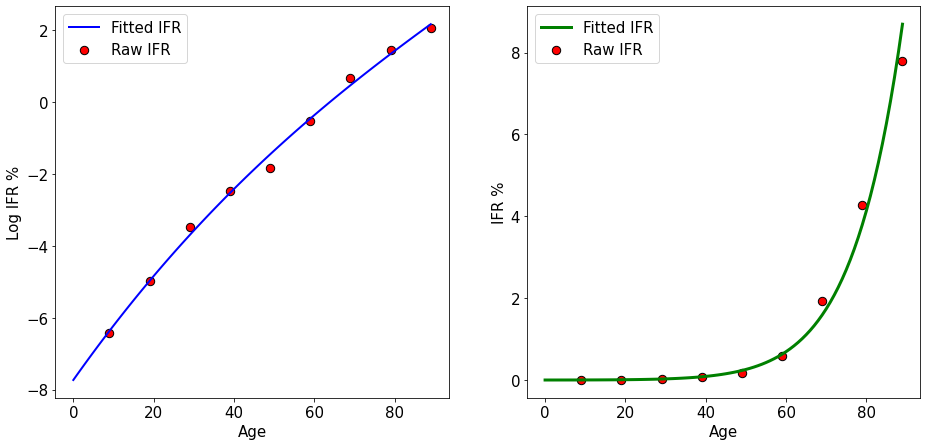

In [123]:
from scipy.interpolate import UnivariateSpline

IFR_Verity = [ .00161, .00695, .0309, .0844, .161, .595, 1.93, 4.28, 7.80 ]
ifr_log    = np.log(IFR_Verity)

IFR = np.zeros((80))

ifr_fitted = UnivariateSpline([9, 19, 29, 39, 49, 59, 69, 79, 89], ifr_log)

# f(x) = UnivariateSpline(x, y)
# artificual = ifr_fitted(new_x)

x = np.arange(0, 90, 1)


fig, ax = plt.subplots(1, 2, figsize=(15.5, 7.2), sharex=True)

ax[0].plot(x, ifr_fitted(x), color='b', lw=2, label="Fitted IFR")
ax[0].scatter([9, 19, 29, 39, 49, 59, 69, 79, 89], np.log(IFR_Verity), edgecolor='k', facecolor='red', s=70, label="Raw IFR")

ifr_fitted = np.exp(ifr_fitted(x))
ax[1].plot(x, ifr_fitted, color='g', lw=3, label="Fitted IFR")
ax[1].scatter([9, 19, 29, 39, 49, 59, 69, 79, 89], IFR_Verity, edgecolor='k', facecolor='red', s=70, label="Raw IFR")

ax[0].tick_params( which='both', axis='both', labelsize=15)
ax[1].tick_params( which='both', axis='both', labelsize=15)

ax[0].set_ylabel("Log IFR %", fontsize=15)
ax[1].set_ylabel("IFR %", fontsize=15)

ax[0].set_xlabel("Age", fontsize=15)
ax[1].set_xlabel("Age", fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

#IFR_sp_pred = spline(IFR_sp$y, xout=seq(0,8,1/10))
#IFR = exp(IFR_sp_pred$y)[-1]

In [2]:

def beta_cooperation_exp(beta_max, coop_frac, type_response="exponential"):

    if type_response=="exponential":
        beta = beta_max*np.exp(-coop_frac)
    elif type_response=="linear":
        beta = beta_max*(1-coop_frac)  + np.exp(-1)*beta_max*coop_frac
    elif type_response=="concave":
        p = 1/(4*(beta_max*np.exp(-1) - beta_max))
        beta2 = (coop_frac**2)/(4*p) + beta_max
        beta  = beta2
    elif type_response=='convex':
        p = 1/(4*(beta_max - beta_max*np.exp(-1)))
        beta2 = ((coop_frac-1)**2)/(4*p) + beta_max*np.exp(-1)
        beta  = beta2
    elif type_response=='s-shape':
        beta_min = beta_max*np.exp(-1)
        r = 10
        c = beta_max / (1 + (beta_max/beta_min - 1)/np.exp(-r))
        beta3 = beta_max/(1 + ((beta_max - beta_min)/beta_min) * np.exp(-(1-coop_frac)*r))
        beta = beta3

    return beta

def SIS_replicator(x, t, beta_max, sigma, gamma, type_response="exponential"):
    global N

    S, I, xc, xd = x

    xr = [xc, xd]
    #beta = beta_max*np.exp(-xr[0])
    beta = beta_cooperation_exp(beta_max, xc, type_response=type_response)
    dS = -beta*S*I + gamma*I
    dI =  beta*S*I - gamma*I
    xdotSIS = [dS, dI]

    # Prisoner's dilemma
    S_ = -0.5
    T_ = 1.5
    # Payoff matrix
    sigma_infection = sigma*I

    A = np.array([[1, S_],
                  [T_-sigma_infection, 0-sigma_infection]])/3

    xdotREP = xr*(np.matmul(A,xr) - np.matmul(xr,np.matmul(A,xr)))

    dxdt = [xdotSIS[0], xdotSIS[1], xdotREP[0], xdotREP[1]]

    return dxdt


def run_sims_SIS_replicator(sigma, prob_infect, type_response="exponential"):
    defectFract = 0.5
    coopFract = 0.5
    N = 5000
    S = N-1
    I = 1
    C = coopFract
    D = defectFract



    y0 = [S/N, I/N, C, D]

    t_max = 150
    t = np.linspace(0, t_max, t_max*2)

    gamma = 1/7

    y = odeint(SIS_replicator, y0, t, args=(prob_infect, sigma, gamma, type_response))
    S_ = y[:,0]
    I_ = y[:,1]
    C_ = y[:,2]
    D_ = y[:,3]

    pd_var = pd.DataFrame(columns=['time', 'sigma', 'beta', 'S', 'I', 'C', 'D'])
    pd_var['time'] = t
    pd_var['sigma'] = sigma
    pd_var['beta'] = prob_infect
    pd_var['S'] = S_
    pd_var['I'] = I_
    pd_var['C'] = C_
    pd_var['D'] = D_

    return pd_var


In [5]:
### Save results

t_max = 150
t = np.linspace(0, t_max, t_max*2)
sigma_search = list(np.arange(0, 1,0.01))+[1]
beta_search  = list(np.arange(0, 1,0.01))+[1]

from tqdm import tqdm

for idx_p, prob in enumerate(tqdm(beta_search)):
    for idx_s, sigma in enumerate(sigma_search):

        pd_var_res = run_sims_SIS_replicator(sigma, prob, type_response="exponential")
        pd_var_res_ = pd_var_res.copy()

        if not os.path.isdir( os.path.join(results_path, 'ode_results', 'exponential') ):
            os.makedirs(os.path.join(results_path, 'ode_results', 'exponential'))

        pd_var_res_.to_csv(os.path.join(results_path, 'ode_results', "exponential", 'ode_replicator_sigma_{:0.2f}_beta_{:0.2f}.csv'.format(sigma,prob)))

100%|██████████| 101/101 [03:52<00:00,  2.31s/it]


In [7]:
### Save results

t_max = 150
t = np.linspace(0, t_max, t_max*2)
sigma_search = list(np.arange(0, 1,0.01))+[1]
beta_search  = list(np.arange(0, 1,0.01))+[1]

from tqdm import tqdm

for idx_p, prob in enumerate(tqdm(beta_search)):
    for idx_s, sigma in enumerate(sigma_search):

        pd_var_res = run_sims_SIS_replicator(sigma, prob, type_response="linear")
        pd_var_res_ = pd_var_res.copy()

        if not os.path.isdir( os.path.join(results_path, 'ode_results', 'linear') ):
            os.makedirs(os.path.join(results_path, 'ode_results', 'linear'))

        pd_var_res_.to_csv(os.path.join(results_path, 'ode_results', "linear", 'ode_replicator_sigma_{:0.2f}_beta_{:0.2f}.csv'.format(sigma,prob)))

100%|██████████| 101/101 [03:47<00:00,  2.25s/it]


In [8]:
### Save results

t_max = 150
t = np.linspace(0, t_max, t_max*2)
sigma_search = list(np.arange(0, 1,0.01))+[1]
beta_search  = list(np.arange(0, 1,0.01))+[1]

from tqdm import tqdm

for idx_p, prob in enumerate(tqdm(beta_search)):
    for idx_s, sigma in enumerate(sigma_search):

        pd_var_res = run_sims_SIS_replicator(sigma, prob, type_response="concave")
        pd_var_res_ = pd_var_res.copy()

        if not os.path.isdir( os.path.join(results_path, 'ode_results', 'concave') ):
            os.makedirs(os.path.join(results_path, 'ode_results', 'concave'))

        pd_var_res_.to_csv(os.path.join(results_path, 'ode_results', "concave", 'ode_replicator_sigma_{:0.2f}_beta_{:0.2f}.csv'.format(sigma,prob)))

  0%|          | 0/101 [00:00<?, ?it/s]/home/covid3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
100%|██████████| 101/101 [03:53<00:00,  2.31s/it]


In [9]:
### Save results

t_max = 150
t = np.linspace(0, t_max, t_max*2)
sigma_search = list(np.arange(0, 1,0.01))+[1]
beta_search  = list(np.arange(0, 1,0.01))+[1]

from tqdm import tqdm

for idx_p, prob in enumerate(tqdm(beta_search)):
    for idx_s, sigma in enumerate(sigma_search):

        pd_var_res = run_sims_SIS_replicator(sigma, prob, type_response="convex")
        pd_var_res_ = pd_var_res.copy()

        if not os.path.isdir( os.path.join(results_path, 'ode_results', 'convex') ):
            os.makedirs(os.path.join(results_path, 'ode_results', 'convex'))

        pd_var_res_.to_csv(os.path.join(results_path, 'ode_results', "convex", 'ode_replicator_sigma_{:0.2f}_beta_{:0.2f}.csv'.format(sigma,prob)))

  0%|          | 0/101 [00:00<?, ?it/s]/home/covid3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
100%|██████████| 101/101 [04:02<00:00,  2.40s/it]


In [10]:
### Save results

t_max = 150
t = np.linspace(0, t_max, t_max*2)
sigma_search = list(np.arange(0, 1,0.01))+[1]
beta_search  = list(np.arange(0, 1,0.01))+[1]

from tqdm import tqdm

for idx_p, prob in enumerate(tqdm(beta_search)):
    for idx_s, sigma in enumerate(sigma_search):

        pd_var_res = run_sims_SIS_replicator(sigma, prob, type_response="s-shape")
        pd_var_res_ = pd_var_res.copy()

        if not os.path.isdir( os.path.join(results_path, 'ode_results', 's-shape') ):
            os.makedirs(os.path.join(results_path, 'ode_results', 's-shape'))

        pd_var_res_.to_csv(os.path.join(results_path, 'ode_results', "s-shape", 'ode_replicator_sigma_{:0.2f}_beta_{:0.2f}.csv'.format(sigma,prob)))

  0%|          | 0/101 [00:00<?, ?it/s]/home/covid3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/covid3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
100%|██████████| 101/101 [04:14<00:00,  2.52s/it]
